<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

**Demonstrate the following edge detection methods  and interpret the results**

# **i) First Order Derivative Methods**

**Sobel Operator**

----

The Sobel operator is primarily used for edge detection in images. Specifically, it is used to highlight the edges or boundaries between objects in an image by calculating the gradient magnitude. This operator is particularly useful in computer vision and image processing tasks where detecting edges is important for tasks such as object detection, segmentation, and feature extraction.

The Sobel operator works by convolving the image with a pair of 3x3 kernels (one for detecting edges in the horizontal direction and the other for the vertical direction) that approximate the gradient of the image intensity. The resulting gradient magnitude represents the strength of the edge at each pixel, with higher values indicating sharper transitions between image regions.

Overall, the Sobel operator is widely used in various applications such as medical image analysis, autonomous driving, image enhancement, and more, where precise edge detection is crucial for subsequent analysis or processing steps.

(-0.5, 1199.5, 672.5, -0.5)

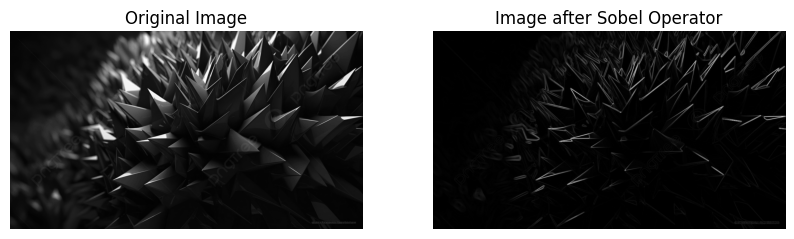

In [ ]:
image = cv2.imread('/content/img11.jpg', cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
direction = np.arctan2(sobel_y, sobel_x)
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Sobel Operator")
plt.imshow(magnitude,"gray")
plt.axis("off")

(-0.5, 1199.5, 672.5, -0.5)

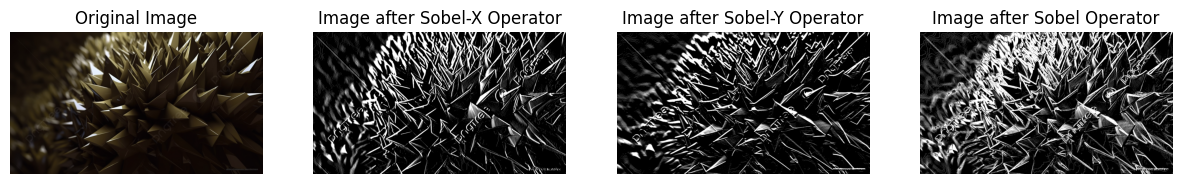

In [ ]:
img = cv2.imread('/content/img11.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after Sobel-X Operator")
plt.imshow(img_sobelx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after Sobel-Y Operator")
plt.imshow(img_sobely,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after Sobel Operator")
plt.imshow(img_sobel,"gray")
plt.axis("off")

**Prewitt Operator**

---

The Prewitt operator, like the Sobel operator, is used for edge detection in images. It calculates the gradient magnitude of an image to identify edges, but it uses a slightly different approach compared to the Sobel operator.

(-0.5, 1199.5, 672.5, -0.5)

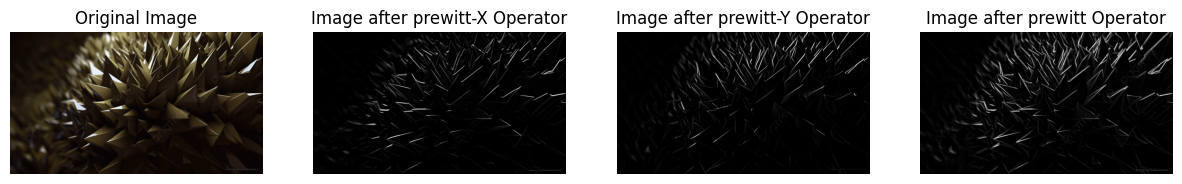

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after prewitt-X Operator")
plt.imshow(img_prewittx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after prewitt-Y Operator")
plt.imshow(img_prewitty,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after prewitt Operator")
plt.imshow(img_prewitt,"gray")
plt.axis("off")

**Roberts Cross Operator**


---


The Roberts Cross operator is another edge detection technique used in image processing. Like the Sobel and Prewitt operators, it's primarily employed to detect edges or boundaries in images.

The Roberts Cross operator detects edges by computing the gradient magnitude using a pair of 2x2 kernels. These kernels are simple and diagonal, which allows the operator to respond strongly to edges with a diagonal orientation.

(-0.5, 1199.5, 672.5, -0.5)

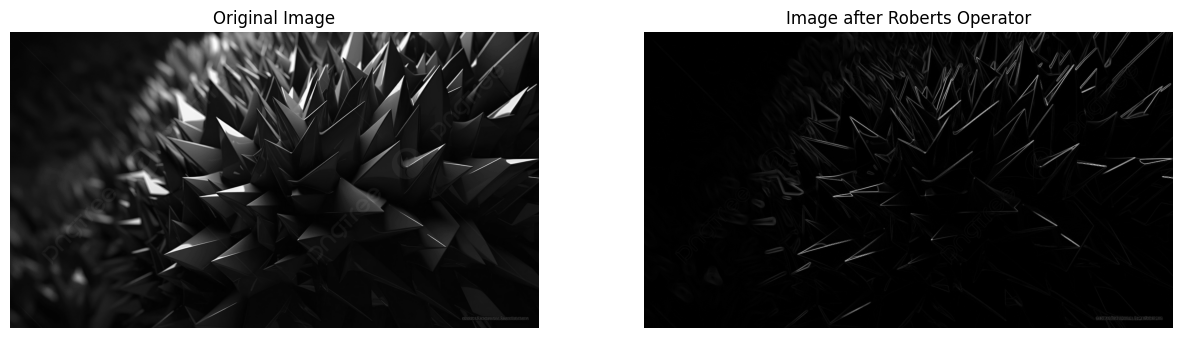

In [ ]:
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )
img = cv2.imread("/content/img11.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Roberts Operator")
plt.imshow(edged_img,"gray")
plt.axis("off")

# **Second-Order Derivative Methods**

**Laplacian Operator**

---

A Laplacian filter is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression.

(-0.5, 1199.5, 672.5, -0.5)

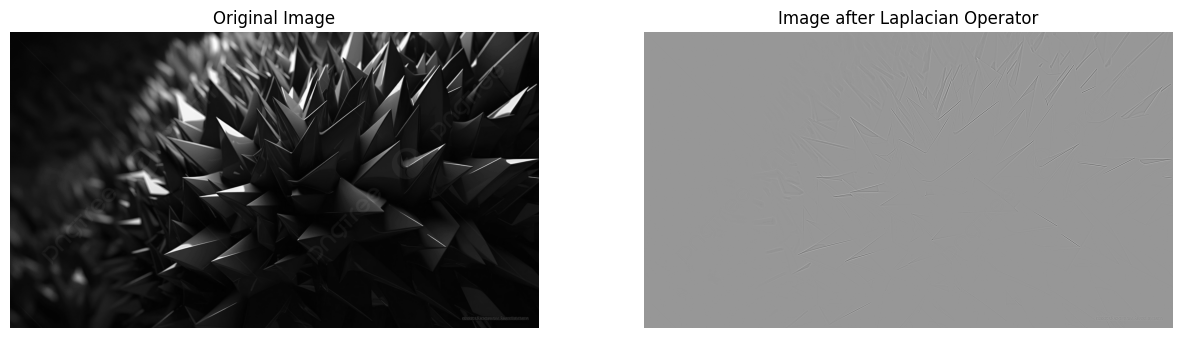

In [ ]:
# Apply Laplacian operator
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Normalize Laplacian to [0, 255]
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display results
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Laplacian Operator")
plt.imshow(laplacian,"gray")
plt.axis("off")

**LoG (Laplacian of Gaussian)**

---

The Laplacian of Gaussian (LoG) filter is a popular edge detection technique that combines Gaussian smoothing with the Laplacian operator to enhance the detection of edges in images.

**Using OpenCV Method**

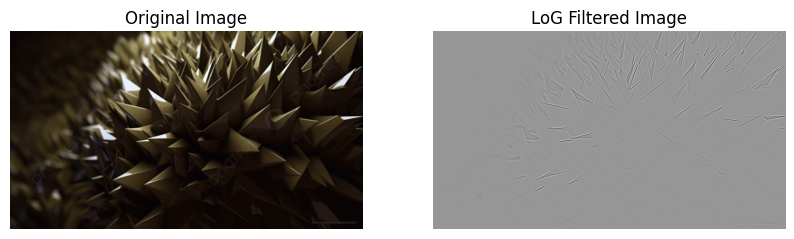

In [ ]:
image = cv2.imread("/content/img11.jpg", cv2.IMREAD_COLOR)
image = cv2.GaussianBlur(image, (3, 3), 0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(filtered_image,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()

**Using Scipy Method**

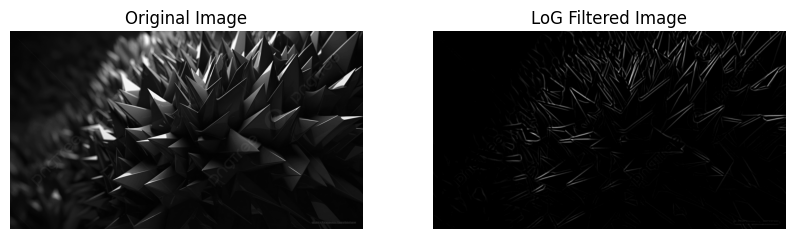

In [ ]:
def LoG_filter_opencv(image, sigma, size=None):
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7
    if size % 2 == 0:
        size += 1
    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))
    result = cv2.filter2D(image, -1, kernel)
    return result
image = cv2.imread(r"/content/img11.jpg", cv2.IMREAD_GRAYSCALE)  # Replace 'path_to_your_image.png' with your image path
sigma = 2.0
filtered_image = LoG_filter_opencv(image, sigma)
filtered_image = cv2.convertScaleAbs(filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(filtered_image,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()

# **iii) Optimum Edge Detection Method**

**Canny Edge Detector**

---

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in. It is a multi-stage algorithm and we will go through each stages. Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. It helps in finding Intensity Gradient of the Image

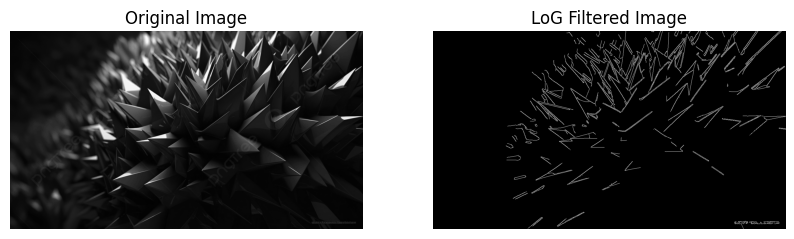

In [ ]:
def canny_edge_detector(image, min_threshold, max_threshold):
    edges = cv2.Canny(image, min_threshold, max_threshold)
    return edges

image = cv2.imread('/content/img11.jpg', cv2.IMREAD_GRAYSCALE)
min_threshold = 100
max_threshold = 200
canny_edges = canny_edge_detector(image, min_threshold, max_threshold)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(canny_edges,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()

**Marr-Hildreth Edge Detector (Laplacian of Gaussian)**

---

The Marr-Hildreth edge detection method, also known as the Laplacian of Gaussian (LoG) method, is an optimal edge detection technique that combines Gaussian smoothing with the Laplacian operator to enhance the detection of edges in images.

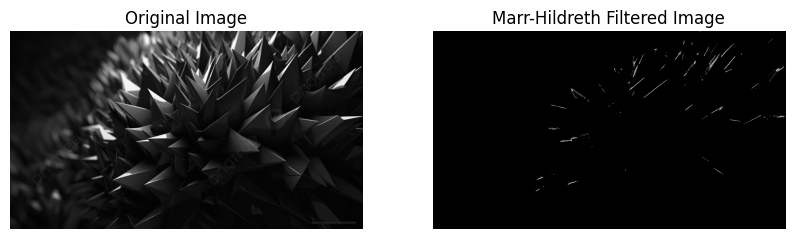

In [ ]:
def marr_hildreth_edge_detector(image, sigma):
    blurred = cv2.GaussianBlur(image, (5, 5), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    zero_crossings = cv2.threshold(np.uint8(np.absolute(laplacian)), 30, 255, cv2.THRESH_BINARY)[1]
    return zero_crossings
image = cv2.imread('/content/img11.jpg', cv2.IMREAD_GRAYSCALE)

sigma = 1.4
marr_hildreth_edges = marr_hildreth_edge_detector(image, sigma)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(marr_hildreth_edges,cmap='gray')
plt.title('Marr-Hildreth Filtered Image')
plt.axis('off')
plt.show()